In [22]:
#importing data processing libraries
import pandas as pd
import numpy as np
#importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# datetime module
import datetime
# to ignore future warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [23]:
#load and read file
player_hall_of_fame= pd.read_csv("basketball_master.csv")

In [24]:
player_hall_of_fame.head()

,bioID,useFirst,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,pos,...,birthDate,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,deathDate,race
0,abdelal01,Alaa,Alaa,NaN,Abdelnaby,NaN,NaN,NaN,NaN,F-C,...,1968-06-24,Cairo,NaN,EGY,Bloomfield Senior,Bloomfield,NJ,USA,0000-00-00,B
1,abdulka01,Kareem,Kareem,NaN,Abdul-Jabbar,NaN,"Ferdinand Lewis Alcindor, Jr.",NaN,"Lew, Cap",C,...,1947-04-16,New York,NY,USA,Power Memorial,New York,NY,USA,0000-00-00,B
2,abdulma01,Mahdi,Mahdi,NaN,Abdul-Rahman,NaN,"Walter Raphael Hazzard, Jr.",NaN,Walt,G,...,1942-04-15,Wilmington,DE,USA,Overbrook / Moton,Philadelphia / Easton,PA / MD,USA,2011-11-18,B
3,abdulma02,Mahmoud,Mahmoud,NaN,Abdul-Rauf,NaN,Chris Wayne Jackson,NaN,NaN,G,...,1969-03-09,Gulfport,MS,USA,Gulfport,Gulfport,MS,USA,0000-00-00,B
4,abdulta01,Tariq,Tariq,NaN,Abdul-Wahad,NaN,Olivier Michael Saint-Jean,NaN,NaN,G-F,...,1974-11-03,Maisons Alfort,NaN,FRA,Lycee Aristide Briand,Evreux,NaN,FRA,0000-00-00,B


**Exploratory Data Analysis**

In [25]:
#It gives us the no of rows and columns
player_hall_of_fame.shape

(5061, 26)

In [26]:
player_hall_of_fame.isnull().any()

bioID            False
useFirst          True
firstName         True
middleName        True
lastName         False
nameGiven         True
fullGivenName     True
nameSuffix        True
nameNick          True
pos               True
firstseason       True
lastseason        True
height            True
weight            True
college           True
collegeOther      True
birthDate         True
birthCity         True
birthState        True
birthCountry      True
highSchool        True
hsCity            True
hsState           True
hsCountry         True
deathDate        False
race              True
dtype: bool

In [27]:
player_hall_of_fame.dtypes

bioID             object
useFirst          object
firstName         object
middleName        object
lastName          object
nameGiven         object
fullGivenName     object
nameSuffix        object
nameNick          object
pos               object
firstseason      float64
lastseason       float64
height           float64
weight           float64
college           object
collegeOther      object
birthDate         object
birthCity         object
birthState        object
birthCountry      object
highSchool        object
hsCity            object
hsState           object
hsCountry         object
deathDate         object
race              object
dtype: object

In [29]:
for i, col in enumerate(player_hall_of_fame.columns):
    print((i+1), '-',col)

1 - bioID
2 - useFirst
3 - firstName
4 - middleName
5 - lastName
6 - nameGiven
7 - fullGivenName
8 - nameSuffix
9 - nameNick
10 - pos
11 - firstseason
12 - lastseason
13 - height
14 - weight
15 - college
16 - collegeOther
17 - birthDate
18 - birthCity
19 - birthState
20 - birthCountry
21 - highSchool
22 - hsCity
23 - hsState
24 - hsCountry
25 - deathDate
26 - race


In [31]:
player_hall_of_fame.describe()

,firstseason,lastseason,height,weight
count,5046.000000,5046.000000,5048.000000,5047.000000
mean,0.386643,0.386643,74.269810,194.565683
std,27.465256,27.465256,15.272533,49.357786
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,74.000000,181.000000
50%,0.000000,0.000000,77.000000,200.000000
75%,0.000000,0.000000,80.000000,220.000000
max,1951.000000,1951.000000,91.000000,330.000000


In [32]:
player_hall_of_fame['hsCountry'].unique()

array(['USA', 'FRA', 'NGR', nan, 'BRA', 'YUG', 'LAT', 'AUS', 'BAH',
       'USA/CAN', 'HOL', 'PAN', 'BUL', 'CUB', 'VEN', 'LTU', 'JAM/USA',
       'CAN/USA', 'DMC', 'HAI', 'RUS', 'CRO', 'CAN', 'NZL', 'SRB', 'SLV',
       'FIN', 'ZAI', 'EST', 'USA / SEN', 'GER', 'ARG', 'TUR', 'ENG',
       'TCH', 'UKR', 'JAM', 'GRE', 'KOR', 'SEN', 'JPN', 'CAN /USA', 'POL',
       'GEO', 'YUG/USA', 'ISV', 'DOM/USA', 'USA / PUR', 'GAB', 'ESP',
       'PUR', 'USa'], dtype=object)

In [34]:
player_hall_of_fame['birthCountry'].unique()

array(['EGY', 'USA', 'FRA', nan, 'NGR', 'LTU', 'BRA', 'SCO', 'TUR', 'ENG',
       'YUG', 'GER', 'ITA', 'CHN', 'RUS', 'ISV', 'LAT', 'PAN', 'AUS',
       'SUD', 'CMR', 'SLV', 'ESP', 'NOR', 'BAH', 'HAI', 'HUN', 'ARG',
       'HOL', 'JAM', 'DOM', 'GRE', 'VIN', 'CRO', 'BUL', 'CAN', 'PCZ',
       'CUB', 'BEL', 'TRI', 'SWE', 'LUX', 'DMC', 'SUI', 'UKR', 'POL',
       'MEX', 'BOS', 'NZL', 'GUY', 'CON', 'SRB', 'FIN', 'ROM', 'ZAI',
       'EST', 'SEN', 'MON', 'TCH', 'MLI', 'LIB', 'KOR', 'SLO', 'GEO',
       'JPN', 'URS', 'IRL', 'MOR', 'ISL', 'PUR', 'SAF', 'TAI', 'ISR',
       'IRI', 'DEN', 'TAN', 'URU', 'COD', 'CGO', 'GAB', 'VEN'],
      dtype=object)

In [35]:
number=len(player_hall_of_fame['birthState'].unique())
number

61

In [36]:
number=len(player_hall_of_fame['bioID'].unique())
number

5061

In [37]:
player_hall_of_fame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061 entries, 0 to 5060
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bioID          5061 non-null   object 
 1   useFirst       4230 non-null   object 
 2   firstName      5037 non-null   object 
 3   middleName     3245 non-null   object 
 4   lastName       5061 non-null   object 
 5   nameGiven      9 non-null      object 
 6   fullGivenName  26 non-null     object 
 7   nameSuffix     323 non-null    object 
 8   nameNick       2707 non-null   object 
 9   pos            4879 non-null   object 
 10  firstseason    5046 non-null   float64
 11  lastseason     5046 non-null   float64
 12  height         5048 non-null   float64
 13  weight         5047 non-null   float64
 14  college        4883 non-null   object 
 15  collegeOther   853 non-null    object 
 16  birthDate      5050 non-null   object 
 17  birthCity      3887 non-null   object 
 18  birthSta

**Data Visualization**

In [40]:
player_hall_of_fame.corr()

,firstseason,lastseason,height,weight
firstseason,1.000000,1.000000,-0.001171,-0.008434
lastseason,1.000000,1.000000,-0.001171,-0.008434
height,-0.001171,-0.001171,1.000000,0.870231
weight,-0.008434,-0.008434,0.870231,1.000000


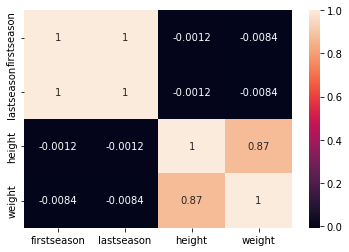

In [43]:
sns.heatmap(player_hall_of_fame.corr(),annot=True)
plt.show()

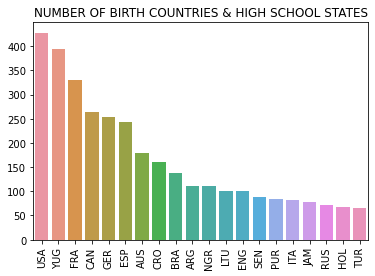

In [44]:
sns.barplot(x=player_hall_of_fame['birthCountry'].value_counts().index[:20],y=player_hall_of_fame['hsState'].value_counts().values[:20])
plt.xticks(rotation=90)
plt.title('NUMBER OF BIRTH COUNTRIES & HIGH SCHOOL STATES')
plt.show()

In [45]:
Birth_State=df['birthState'].value_counts()
names=Birth_State.index
values=Birth_State.values

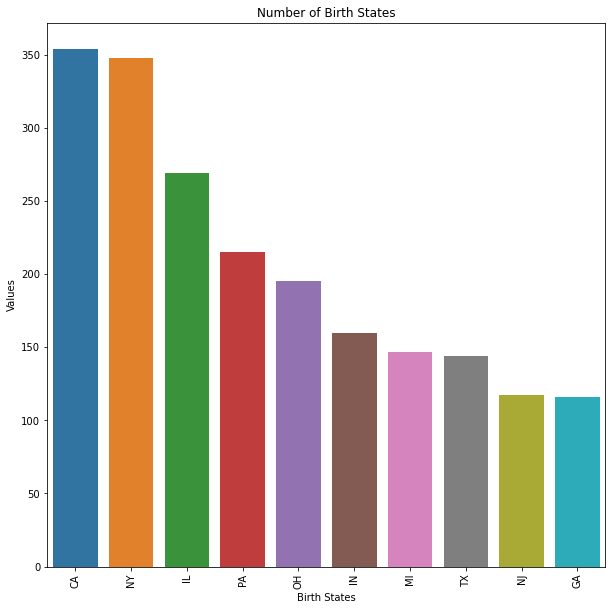

In [46]:
plt.figure(figsize=(10,10))
sns.barplot(x=names[:10],y=values[:10])
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.xlabel('Birth States')
plt.title('Number of Birth States')
plt.show()